In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import model_selection
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
loan_df = pd.read_csv("Downloads/Task 3 and 4_Loan_Data.csv")
loan_df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [3]:
loan_df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


#### Exploratory data analysis

In [4]:
loan_df.default.value_counts()

0    8149
1    1851
Name: default, dtype: int64

Text(0.5, 0, 'FICO Score')

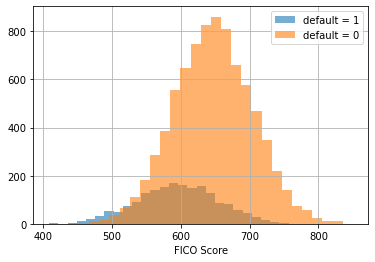

In [5]:
loan_df[loan_df['default']==1]['fico_score'].hist(bins=30, alpha = 0.6, label='default = 1')
loan_df[loan_df['default']==0]['fico_score'].hist(bins=30, alpha = 0.6, label='default = 0')
plt.legend()
plt.xlabel('FICO Score')

Text(0.5, 0, 'Income')

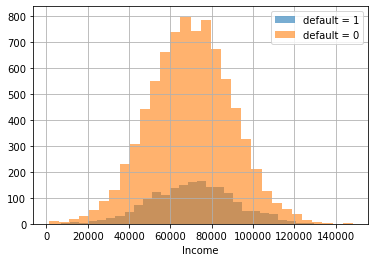

In [6]:
loan_df[loan_df['default']==1]['income'].hist(bins=30, alpha = 0.6, label='default = 1')
loan_df[loan_df['default']==0]['income'].hist(bins=30, alpha = 0.6, label='default = 0')
plt.legend()
plt.xlabel('Income')

Text(0.5, 0, 'loan_amt_outstanding')

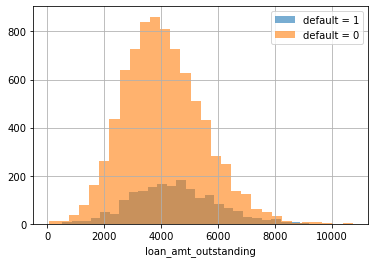

In [7]:
loan_df[loan_df['default']==1]['loan_amt_outstanding'].hist(bins=30, alpha = 0.6, label='default = 1')
loan_df[loan_df['default']==0]['loan_amt_outstanding'].hist(bins=30, alpha = 0.6, label='default = 0')
plt.legend()
plt.xlabel('loan_amt_outstanding')

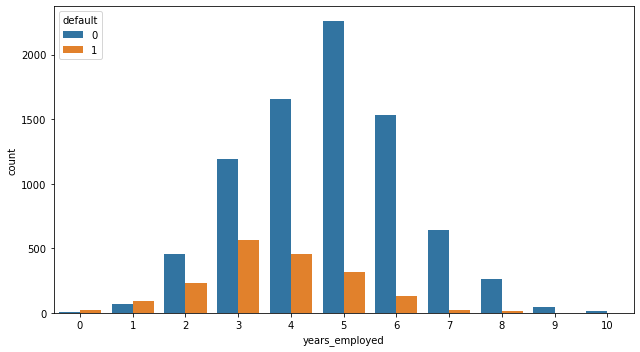

In [8]:
plt.figure(figsize=(9,5))
sns.countplot(x=loan_df['years_employed'], hue = loan_df['default'])
plt.tight_layout()

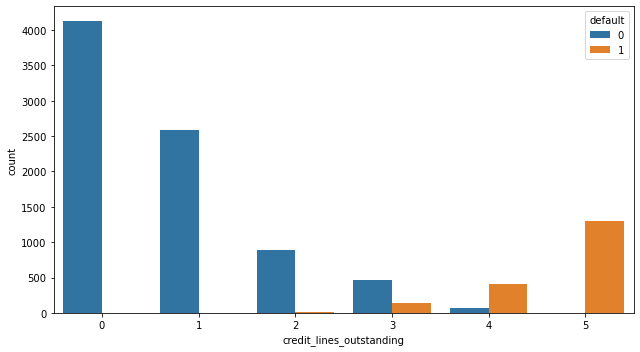

In [9]:
plt.figure(figsize=(9,5))
sns.countplot(x=loan_df['credit_lines_outstanding'], hue = loan_df['default'])
plt.tight_layout()

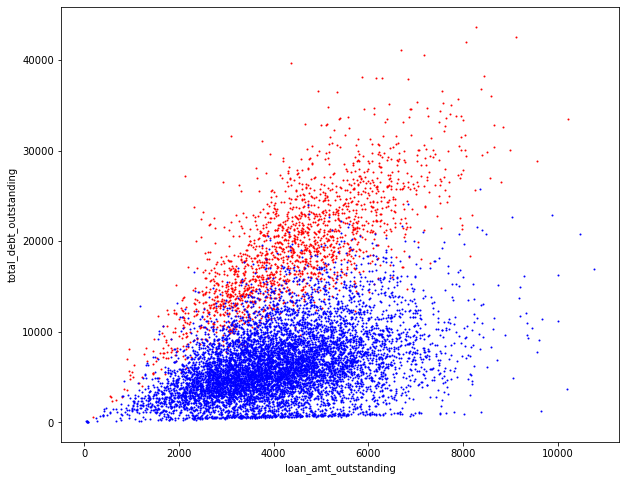

In [10]:
plt.figure(figsize=(10,8))
plt.scatter(loan_df[loan_df['default']==1]['loan_amt_outstanding'],loan_df[loan_df['default']==1]['total_debt_outstanding'], c='r',s=1)
plt.scatter(loan_df[loan_df['default']==0]['loan_amt_outstanding'],loan_df[loan_df['default']==0]['total_debt_outstanding'], c='b',s=1)
plt.ylabel('total_debt_outstanding')
plt.xlabel('loan_amt_outstanding')
plt.show()

In [11]:
print(loan_df[loan_df['default']==1].describe())

        customer_id  credit_lines_outstanding  loan_amt_outstanding  \
count  1.851000e+03               1851.000000           1851.000000   
mean   5.007914e+06                  4.618044           4454.854897   
std    2.278015e+06                  0.637969           1471.586769   
min    1.000324e+06                  2.000000            189.725024   
25%    3.016468e+06                  4.000000           3395.163895   
50%    5.116813e+06                  5.000000           4393.697084   
75%    6.972913e+06                  5.000000           5388.006613   
max    8.989969e+06                  5.000000          10210.746690   

       total_debt_outstanding         income  years_employed   fico_score  \
count             1851.000000    1851.000000     1851.000000  1851.000000   
mean             19270.582961   70726.740140        3.617504   596.257699   
std               6298.378378   20363.512385        1.401002    58.949929   
min                592.445977    2836.241899        

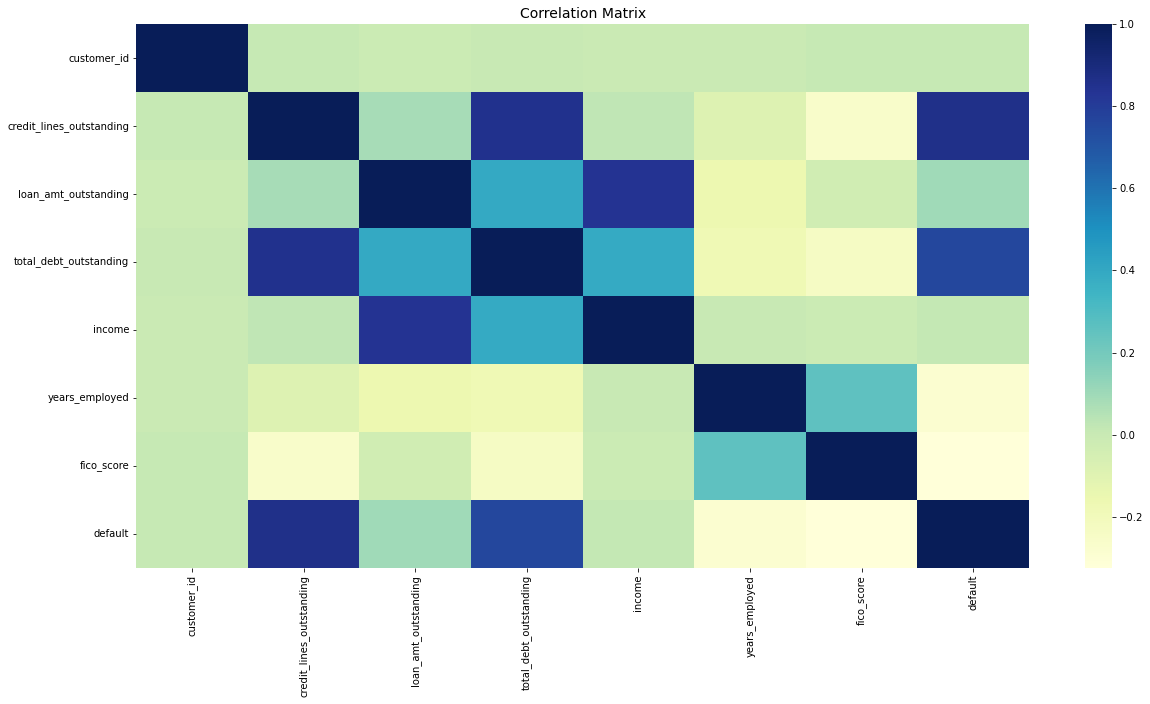

In [12]:
fig, ax = plt.subplots(figsize=(20,10))
corr = loan_df.corr()
sns.heatmap(corr, cmap='YlGnBu', annot_kws={'size':30}, ax=ax)
ax.set_title("Correlation Matrix", fontsize=14)
plt.show()

#### Predictions of probability for loan status

In [14]:
x = loan_df.drop(['default','customer_id'], axis =1)
y = loan_df['default']


In [15]:
scaler = StandardScaler()

In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=43)

In [19]:
x_train_scaled = scaler.fit_transform(x_train)  # Fit and transform on training data
x_test_scaled = scaler.transform(x_test) 

In [20]:
log_reg = LogisticRegression(max_iter=10000)
log_reg.fit(x_train_scaled,y_train)

LogisticRegression(max_iter=10000)

In [21]:
# To predict the probabilities of default
probabilities_log_reg = log_reg.predict_proba(x_test_scaled)[:,1] # since we need prob of default only
# returns prob that a particular person(given by each row) makes no default with a prob given by the first column, and default with a prob given by second col
probabilities_log_reg

array([9.03515340e-01, 5.18119270e-09, 6.27603311e-06, ...,
       1.25828820e-10, 9.99999474e-01, 2.66255011e-01])

In [22]:
y_pred = log_reg.predict(x_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

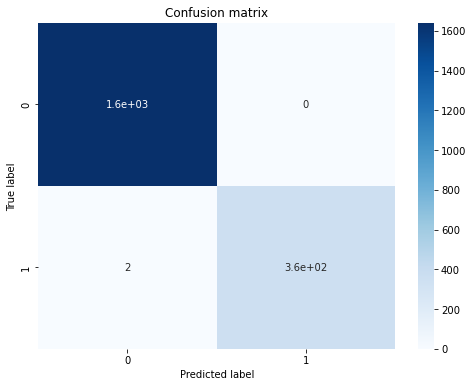

In [23]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [24]:
# To get the fetaure names and the coefficients
feature_names = x.columns
coefficients = log_reg.coef_[0]
coeff_df = pd.DataFrame({'Features':feature_names, 'Coefficients':coefficients })
coeff_df

,Features,Coefficients
0,credit_lines_outstanding,8.462789
1,loan_amt_outstanding,0.248872
2,total_debt_outstanding,4.185165
3,income,-2.666483
4,years_employed,-2.874853
5,fico_score,-1.187903


In [25]:
dec_tree = DecisionTreeClassifier(max_depth=5, random_state=43)
dec_tree.fit(x_train_scaled,y_train)

DecisionTreeClassifier(max_depth=5, random_state=43)

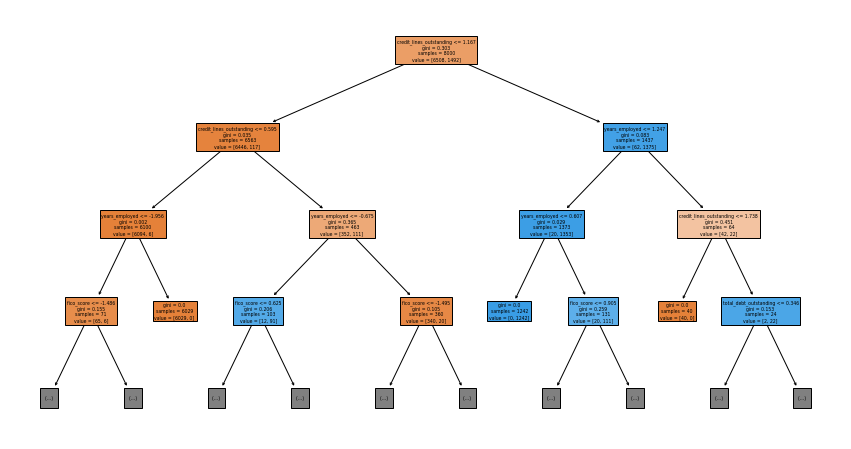

In [26]:
plt.figure(figsize=(15,8))
plot_tree(dec_tree, filled = True, feature_names = feature_names, max_depth=3 )
plt.show()

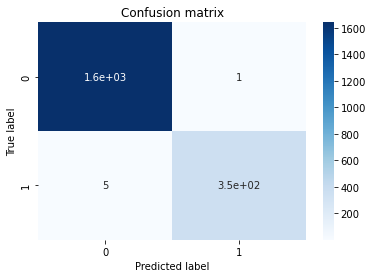

In [27]:
y_pred_dt = dec_tree.predict(x_test_scaled)
conf_matrix_dt = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(conf_matrix_dt, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

In [28]:
probabilities_dt_reg = dec_tree.predict_proba(x_test_scaled)[:,1] 
probabilities_dt_reg

array([1.        , 0.        , 0.        , ..., 0.        , 1.        ,
       0.02095808])

In [29]:
probabilities_log_reg = log_reg.predict_proba(x_test_scaled)[:,1] 
probabilities_log_reg

array([9.03515340e-01, 5.18119270e-09, 6.27603311e-06, ...,
       1.25828820e-10, 9.99999474e-01, 2.66255011e-01])

In [30]:
from sklearn.metrics import roc_auc_score
logistic_auc_balanced = roc_auc_score(y_test,probabilities_log_reg)
dt_auc_balanced = roc_auc_score(y_test,probabilities_dt_reg)
print(logistic_auc_balanced,dt_auc_balanced)

0.999998302550079 0.9968189788480766


#### Expected Loss = Probability of Default×(1 - Recovery Rate)×Loan Amount

In [31]:
def calculate_expected_loss(model, features, loan_amount, recovery_rate = 0.10):
    # recovery_rate - the expected recovery rate in the event of a default
    # loan_amount - the outstanding amount of the loan.
    # features - features of the loan.
    probability_of_default = model.predict_proba(features)[:, 1]  # Predict the probability of default
    expected_loss = probability_of_default * (1 - recovery_rate) * loan_amount  # Calculate expected loss
    return expected_loss

In [32]:
test_loan_features = pd.DataFrame([{
    'credit_lines_outstanding': 5,
    'loan_amt_outstanding': 5000,  # $5,000 loan
    'total_debt_outstanding': 7500,  # Total debt $7,500
    'income': 35000,  # Annual income $55,000
    'years_employed': 4,
    'fico_score': 610,

}])
test_loan_features_scaled = scaler.transform(test_loan_features)
# test_loan_features_scaled = scaler.transform(test_loan_features)
expected_loss_example_log = calculate_expected_loss(log_reg, test_loan_features_scaled, 5000)
print(f'Expected loss is from log: ${round(expected_loss_example_log[-1],2)}')
expected_loss_example_dt = calculate_expected_loss(dec_tree, test_loan_features_scaled, 5000)
print(f'Expected loss is from decision tree: ${round(expected_loss_example_dt[-1],2)}')

Expected loss is from log: $4499.68
Expected loss is from decision tree: $4500.0
